# Fish Weight Prediction using Regression Models

## Data Acquisition and Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
# Check for missing values
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [3]:
# One-hot encode the categorical 'Species' column
df = pd.get_dummies(df, columns=['Species'], drop_first=True)

# Split dataset into features and target
X = df.drop('Weight', axis=1)
y = df['Weight']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis and Feature Engineering

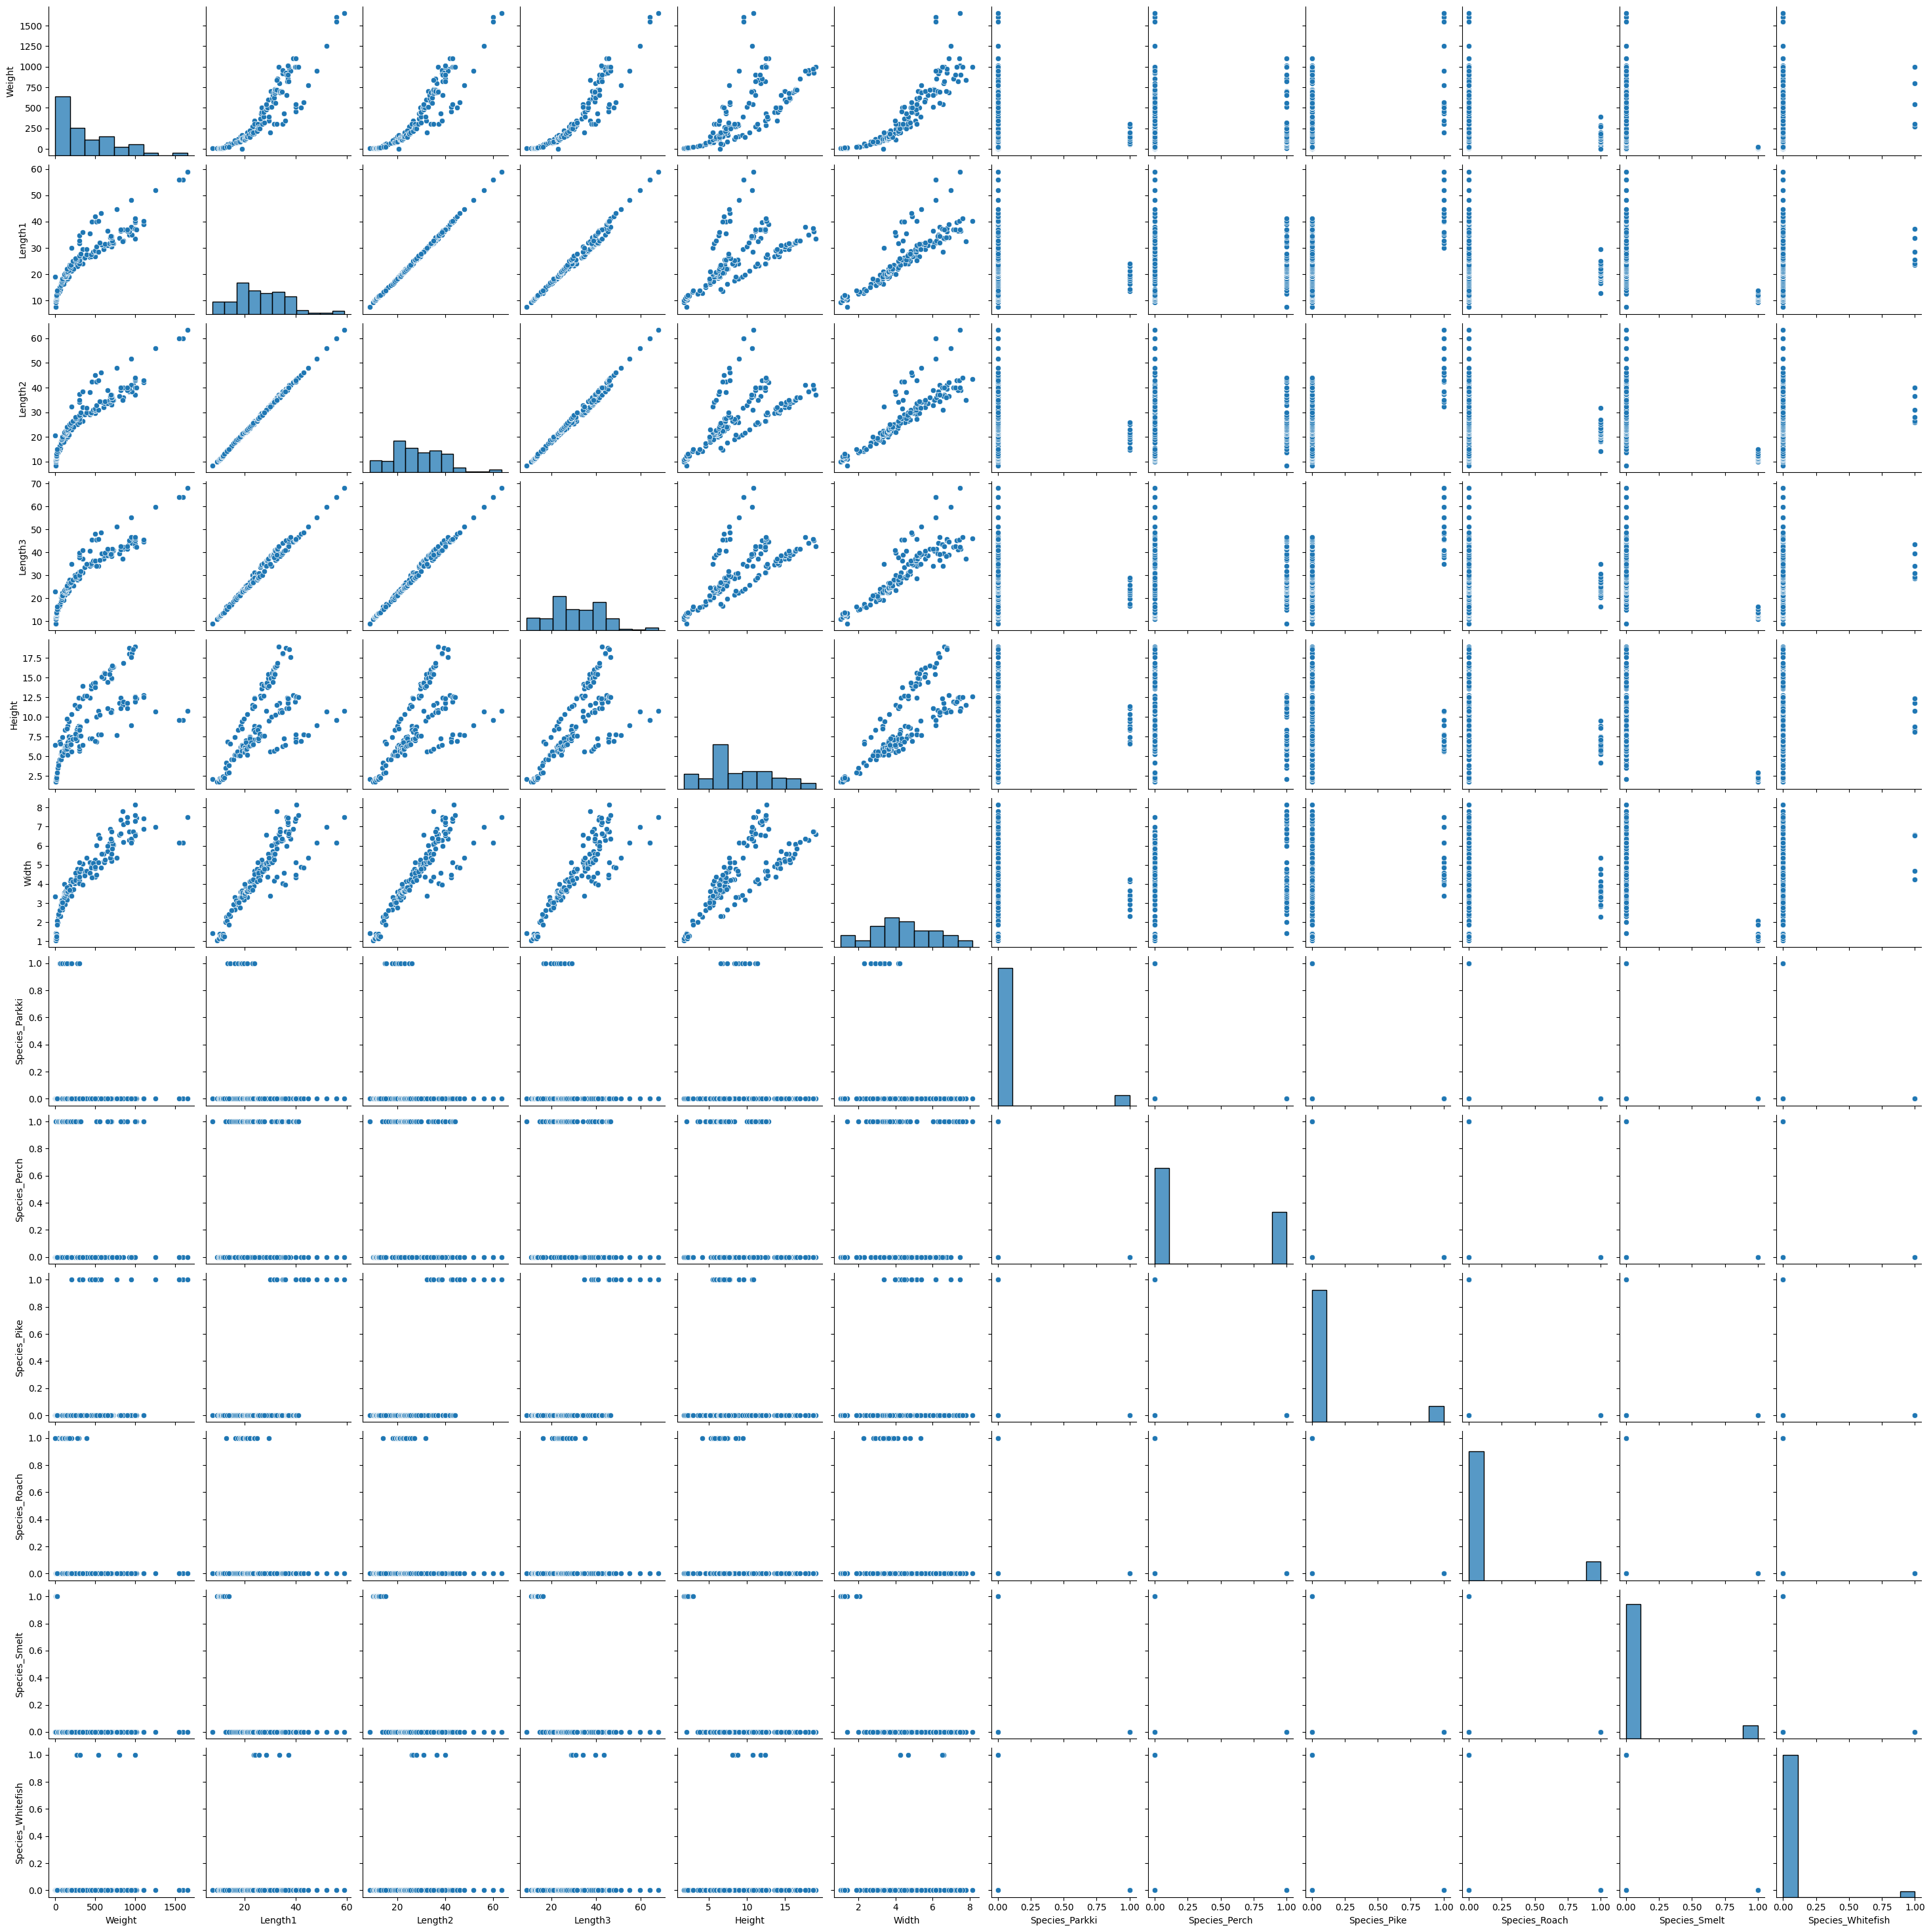

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(df)
plt.show()

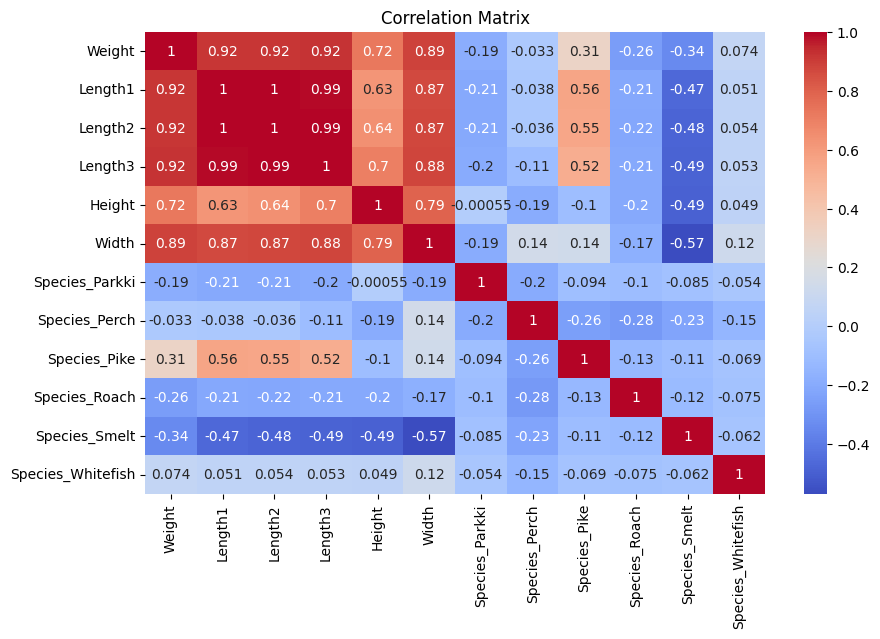

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

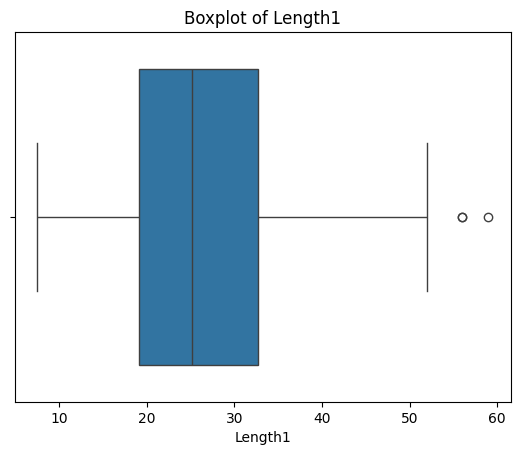

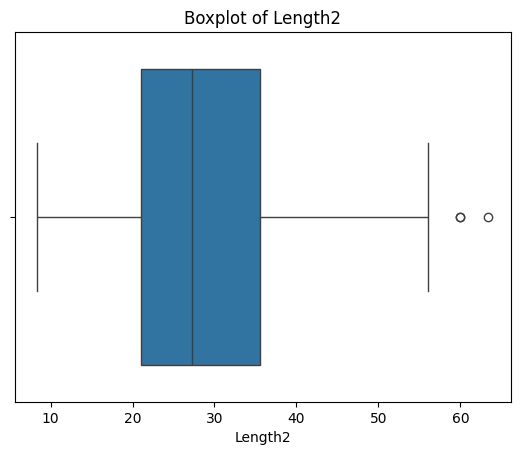

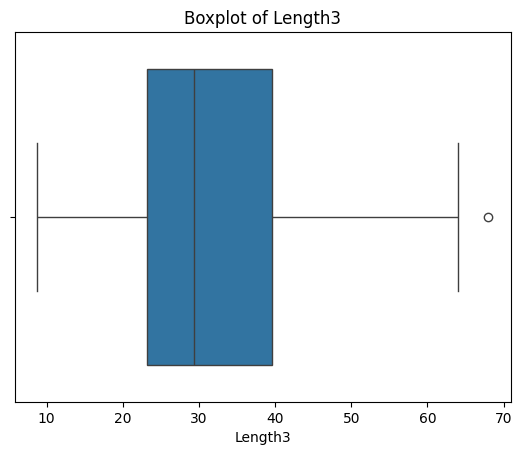

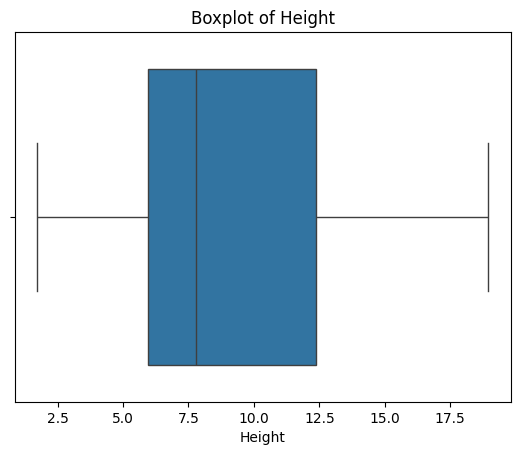

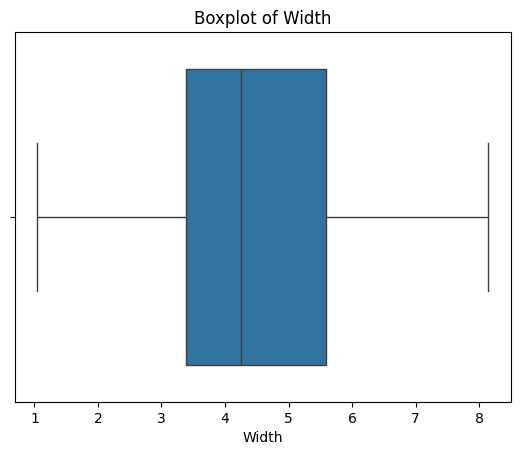

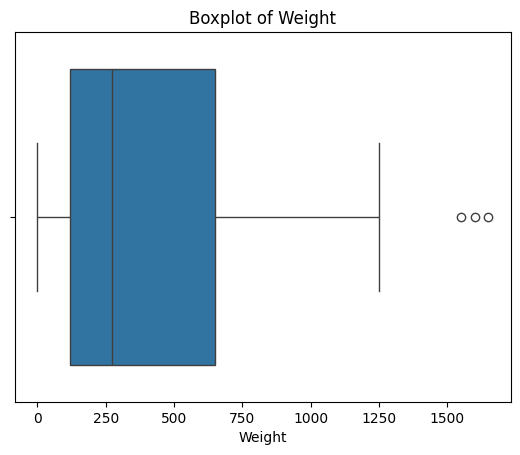

In [6]:
# Boxplots for outlier detection
for col in ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Weight']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Feature Engineering

In [7]:
# Interaction feature
df['Length_Width'] = df['Length2'] * df['Width']

# Recreate feature/target split
X = df.drop('Weight', axis=1)
y = df['Weight']

# Train-test split again after new feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Development and Comparison

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Polynomial Regression (Degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "R2": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.sort_values(by='RMSE')

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


,RMSE,R2
Linear Regression,60.366192,0.974381
Lasso Regression,61.524952,0.973388
Ridge Regression,63.375287,0.971763
Polynomial Regression (Degree 2),74.401838,0.961082
